# In the last notebook we saw how choice of hyerp-parameters can effect the results, now we'll focus on tuning them

## Tuning The Hyperparameters  - Using A Naive Pythonic Approach

We will be using the boston dataset for the examples and the exercises. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge 
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor

We'll be using a train-test split of 80:20 for training and validation of the algorithm

In [30]:
X,y = load_boston(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Lets build our own Simple Hyperparameter Tuner !!

In [31]:
def custom_hyperparameter_tuner(hyperparams_dict, algorithm, metric_score="score"):
    
    """
    Implementation of a Simple Loop Based 
    Hyperparameter Tuning based on the metric score, , 
    hyperparameter combinations and algorithms provided as arguments
    """
    
    if metric_score=="score":
        
        """
        Based on the r2_score , it selects out the best hyperparameter out of all the hyperparameters 
        """
        
        best_hyperparams=None
        best_accuracy=-99999
        tuner_history={}
        
        
        if algorithm=="Ridge":
            for i in hyperparams_dict:
                ridge = Ridge(alpha = i['alpha'])
                ridge.fit(x_train,y_train)
                y_pred = ridge.predict(x_test)
                score = ridge.score(x_test, y_test)
                print("Hyperparameter:",i)
                print("Accuracy:",score)
                print("\n====================================\n")
                tuner_history[str(i)]=score
                if score > best_accuracy:
                    best_accuracy=score
                    best_hyperparams=i
                    
        
        if algorithm=="KNearest":
            for i in hyperparams_dict:
                knearest=KNeighborsRegressor(n_neighbors=i['n_neighbors'],weights=i['weights'])
                knearest.fit(x_train,y_train)
                y_pred = knearest.predict(x_test)
                score = knearest.score(x_test , y_test)
                print("Hyperparameter:",i)
                print("Accuracy:",score)
                print("\n====================================\n")
                tuner_history[str(i)]=score
                if score > best_accuracy:
                    best_accuracy=score
                    best_hyperparams=i
            
            
#         if algorithm=="SVM Regressor":
#         """
#             1. Create a SVM Regressor for each of the choice sets in the hyperparams_dict
#             2. Fit it on X_train and predict on X_test 
#             3. Calculate r2_score and find the best hyperparams
#         """
        
    return (best_hyperparams,tuner_history)

Create the Hyperparameter Combinations by using loops

In [32]:
def create_hyperparameter_dict( algorithm ):
    hyperparams_dict=[]
    if algorithm=="Ridge":
        """
        For Ridge , We have taken only one hyperparameter(alpha)'s hyperparameters .
        alpha: can be any value b/w 0 and 1
        """
        for i in range(1,1000):
            hyperparams_dict.append({"alpha":i*0.01})
            i+=1
    
    if algorithm=="KNearest":
        """
        For KNearest Regressor , We have taken n_neighbors and weights as the hyperparameters
        n_neighbors: can have any integral value b/w 1 to no_of_samples
        weights: can be any one out of {"uniform","distance"}
        """
        weights=["uniform","distance"]
        for i in range(1,x_train.shape[0],5):
            for j in range(0,2,1):
                hyperparams_dict.append({"n_neighbors":i,"weights":weights[j]})


#     if algorithm=="SVMRegressor":
#         """
#         For SVM Regressor , take kernel , C(penality parameter) , max_iter  as the hyperparameters
#         kernel: can be any one out of {"linear","poly","rbf","sigmoid"}
#         C: can be any value b/w 0 and 1 
#         max_iter: can be b/w (1,100)
#         """
            
    
    return hyperparams_dict


# We have our Hyperparameter Tuner !! Lets Test it 

###### create the search space
hyperparams_dict=create_hyperparameter_dict("KNearest")  

#tune the hyper-params on space
best_hyperparams=custom_hyperparameter_tuner(hyperparams_dict,"KNearest","score") 

print("Best Hyperparameters for Ridge Regression: "+str(best_hyperparams))

In [33]:
#create the search space
hyperparams_dict2=create_hyperparameter_dict("Ridge")

#create the search space
best_hyperparams2,history=custom_hyperparameter_tuner(hyperparams_dict2,"Ridge","score")

print("Best Hyperparameters for KNearest: " +str(best_hyperparams2))

('Hyperparameter:', {'alpha': 0.01})
('Accuracy:', 0.673299946343966)


('Hyperparameter:', {'alpha': 0.02})
('Accuracy:', 0.6732169565054342)


('Hyperparameter:', {'alpha': 0.03})
('Accuracy:', 0.6731336475530765)


('Hyperparameter:', {'alpha': 0.04})
('Accuracy:', 0.6730500813785706)


('Hyperparameter:', {'alpha': 0.05})
('Accuracy:', 0.6729663156405564)


('Hyperparameter:', {'alpha': 0.06})
('Accuracy:', 0.6728824040467367)


('Hyperparameter:', {'alpha': 0.07})
('Accuracy:', 0.6727983966158565)


('Hyperparameter:', {'alpha': 0.08})
('Accuracy:', 0.6727143399211204)


('Hyperparameter:', {'alpha': 0.09})
('Accuracy:', 0.6726302773164828)


('Hyperparameter:', {'alpha': 0.1})
('Accuracy:', 0.6725462491471208)


('Hyperparameter:', {'alpha': 0.11})
('Accuracy:', 0.6724622929452917)


('Hyperparameter:', {'alpha': 0.12})
('Accuracy:', 0.6723784436126797)


('Hyperparameter:', {'alpha': 0.13})
('Accuracy:', 0.6722947335902378)


('Hyperparameter:', {'alpha': 0.14})
('Accuracy:', 0.

('Hyperparameter:', {'alpha': 1.36})
('Accuracy:', 0.6650680674807663)


('Hyperparameter:', {'alpha': 1.37})
('Accuracy:', 0.6650310821621127)


('Hyperparameter:', {'alpha': 1.3800000000000001})
('Accuracy:', 0.664994340213997)


('Hyperparameter:', {'alpha': 1.3900000000000001})
('Accuracy:', 0.6649578394524047)


('Hyperparameter:', {'alpha': 1.4000000000000001})
('Accuracy:', 0.6649215777150406)


('Hyperparameter:', {'alpha': 1.41})
('Accuracy:', 0.6648855528611751)


('Hyperparameter:', {'alpha': 1.42})
('Accuracy:', 0.6648497627714884)


('Hyperparameter:', {'alpha': 1.43})
('Accuracy:', 0.6648142053479089)


('Hyperparameter:', {'alpha': 1.44})
('Accuracy:', 0.6647788785134531)


('Hyperparameter:', {'alpha': 1.45})
('Accuracy:', 0.6647437802120587)


('Hyperparameter:', {'alpha': 1.46})
('Accuracy:', 0.6647089084084185)


('Hyperparameter:', {'alpha': 1.47})
('Accuracy:', 0.6646742610878109)


('Hyperparameter:', {'alpha': 1.48})
('Accuracy:', 0.6646398362559278)


('Hyperpar

('Hyperparameter:', {'alpha': 2.58})
('Accuracy:', 0.6618634127366947)


('Hyperparameter:', {'alpha': 2.59})
('Accuracy:', 0.6618449600823967)


('Hyperparameter:', {'alpha': 2.6})
('Accuracy:', 0.661826597270698)


('Hyperparameter:', {'alpha': 2.61})
('Accuracy:', 0.6618083236527652)


('Hyperparameter:', {'alpha': 2.62})
('Accuracy:', 0.6617901385856878)


('Hyperparameter:', {'alpha': 2.63})
('Accuracy:', 0.6617720414324161)


('Hyperparameter:', {'alpha': 2.64})
('Accuracy:', 0.6617540315616963)


('Hyperparameter:', {'alpha': 2.65})
('Accuracy:', 0.6617361083480091)


('Hyperparameter:', {'alpha': 2.66})
('Accuracy:', 0.6617182711715069)


('Hyperparameter:', {'alpha': 2.67})
('Accuracy:', 0.6617005194179522)


('Hyperparameter:', {'alpha': 2.68})
('Accuracy:', 0.6616828524786577)


('Hyperparameter:', {'alpha': 2.69})
('Accuracy:', 0.6616652697504275)


('Hyperparameter:', {'alpha': 2.7})
('Accuracy:', 0.6616477706354955)


('Hyperparameter:', {'alpha': 2.71})
('Accuracy:', 0.6

('Hyperparameter:', {'alpha': 4.09})
('Accuracy:', 0.6598226699019882)


('Hyperparameter:', {'alpha': 4.1})
('Accuracy:', 0.6598127908203908)


('Hyperparameter:', {'alpha': 4.11})
('Accuracy:', 0.6598029461786434)


('Hyperparameter:', {'alpha': 4.12})
('Accuracy:', 0.6597931357850576)


('Hyperparameter:', {'alpha': 4.13})
('Accuracy:', 0.6597833594492994)


('Hyperparameter:', {'alpha': 4.14})
('Accuracy:', 0.6597736169823787)


('Hyperparameter:', {'alpha': 4.15})
('Accuracy:', 0.6597639081966362)


('Hyperparameter:', {'alpha': 4.16})
('Accuracy:', 0.6597542329057332)


('Hyperparameter:', {'alpha': 4.17})
('Accuracy:', 0.6597445909246401)


('Hyperparameter:', {'alpha': 4.18})
('Accuracy:', 0.659734982069624)


('Hyperparameter:', {'alpha': 4.19})
('Accuracy:', 0.6597254061582398)


('Hyperparameter:', {'alpha': 4.2})
('Accuracy:', 0.6597158630093167)


('Hyperparameter:', {'alpha': 4.21})
('Accuracy:', 0.6597063524429498)


('Hyperparameter:', {'alpha': 4.22})
('Accuracy:', 0.6

('Hyperparameter:', {'alpha': 5.51})
('Accuracy:', 0.6586928144219623)


('Hyperparameter:', {'alpha': 5.5200000000000005})
('Accuracy:', 0.6586863920121335)


('Hyperparameter:', {'alpha': 5.53})
('Accuracy:', 0.6586799863788664)


('Hyperparameter:', {'alpha': 5.54})
('Accuracy:', 0.6586735974449616)


('Hyperparameter:', {'alpha': 5.55})
('Accuracy:', 0.6586672251336654)


('Hyperparameter:', {'alpha': 5.5600000000000005})
('Accuracy:', 0.6586608693686682)


('Hyperparameter:', {'alpha': 5.57})
('Accuracy:', 0.6586545300740987)


('Hyperparameter:', {'alpha': 5.58})
('Accuracy:', 0.6586482071745231)


('Hyperparameter:', {'alpha': 5.59})
('Accuracy:', 0.6586419005949414)


('Hyperparameter:', {'alpha': 5.6000000000000005})
('Accuracy:', 0.6586356102607842)


('Hyperparameter:', {'alpha': 5.61})
('Accuracy:', 0.6586293360979085)


('Hyperparameter:', {'alpha': 5.62})
('Accuracy:', 0.658623078032598)


('Hyperparameter:', {'alpha': 5.63})
('Accuracy:', 0.6586168359915558)


('Hyperpar

('Hyperparameter:', {'alpha': 6.97})
('Accuracy:', 0.6579002456238622)


('Hyperparameter:', {'alpha': 6.98})
('Accuracy:', 0.6578956359749342)


('Hyperparameter:', {'alpha': 6.99})
('Accuracy:', 0.657891035328332)


('Hyperparameter:', {'alpha': 7.0})
('Accuracy:', 0.6578864436485387)


('Hyperparameter:', {'alpha': 7.01})
('Accuracy:', 0.6578818609002097)


('Hyperparameter:', {'alpha': 7.0200000000000005})
('Accuracy:', 0.6578772870481729)


('Hyperparameter:', {'alpha': 7.03})
('Accuracy:', 0.6578727220574272)


('Hyperparameter:', {'alpha': 7.04})
('Accuracy:', 0.6578681658931421)


('Hyperparameter:', {'alpha': 7.05})
('Accuracy:', 0.6578636185206559)


('Hyperparameter:', {'alpha': 7.0600000000000005})
('Accuracy:', 0.6578590799054755)


('Hyperparameter:', {'alpha': 7.07})
('Accuracy:', 0.6578545500132741)


('Hyperparameter:', {'alpha': 7.08})
('Accuracy:', 0.6578500288098929)


('Hyperparameter:', {'alpha': 7.09})
('Accuracy:', 0.6578455162613359)


('Hyperparameter:', {'alp

('Hyperparameter:', {'alpha': 8.3})
('Accuracy:', 0.6573544420860478)


('Hyperparameter:', {'alpha': 8.31})
('Accuracy:', 0.6573507735682754)


('Hyperparameter:', {'alpha': 8.32})
('Accuracy:', 0.6573471105304527)


('Hyperparameter:', {'alpha': 8.33})
('Accuracy:', 0.6573434529532692)


('Hyperparameter:', {'alpha': 8.34})
('Accuracy:', 0.6573398008174974)


('Hyperparameter:', {'alpha': 8.35})
('Accuracy:', 0.6573361541039932)


('Hyperparameter:', {'alpha': 8.36})
('Accuracy:', 0.6573325127936935)


('Hyperparameter:', {'alpha': 8.370000000000001})
('Accuracy:', 0.6573288768676169)


('Hyperparameter:', {'alpha': 8.38})
('Accuracy:', 0.6573252463068633)


('Hyperparameter:', {'alpha': 8.39})
('Accuracy:', 0.6573216210926136)


('Hyperparameter:', {'alpha': 8.4})
('Accuracy:', 0.6573180012061283)


('Hyperparameter:', {'alpha': 8.41})
('Accuracy:', 0.6573143866287483)


('Hyperparameter:', {'alpha': 8.42})
('Accuracy:', 0.657310777341894)


('Hyperparameter:', {'alpha': 8.43})
('Ac

('Hyperparameter:', {'alpha': 9.43})
('Accuracy:', 0.6569705347025315)


('Hyperparameter:', {'alpha': 9.44})
('Accuracy:', 0.6569673801868361)


('Hyperparameter:', {'alpha': 9.450000000000001})
('Accuracy:', 0.6569642294075053)


('Hyperparameter:', {'alpha': 9.46})
('Accuracy:', 0.6569610823523899)


('Hyperparameter:', {'alpha': 9.47})
('Accuracy:', 0.656957939009388)


('Hyperparameter:', {'alpha': 9.48})
('Accuracy:', 0.6569547993664451)


('Hyperparameter:', {'alpha': 9.49})
('Accuracy:', 0.6569516634115535)


('Hyperparameter:', {'alpha': 9.5})
('Accuracy:', 0.6569485311327525)


('Hyperparameter:', {'alpha': 9.51})
('Accuracy:', 0.6569454025181278)


('Hyperparameter:', {'alpha': 9.52})
('Accuracy:', 0.6569422775558117)


('Hyperparameter:', {'alpha': 9.53})
('Accuracy:', 0.6569391562339825)


('Hyperparameter:', {'alpha': 9.540000000000001})
('Accuracy:', 0.656936038540864)


('Hyperparameter:', {'alpha': 9.55})
('Accuracy:', 0.6569329244647267)


('Hyperparameter:', {'alpha'

In [13]:
history.values()

[0.6601360665507184,
 0.6576801327160913,
 0.6587912176549044,
 0.6592849262832109,
 0.6679426885315549,
 0.6602946182395293,
 0.6569673801868361,
 0.6570473964318548,
 0.6576633776531873,
 0.6647089084084185,
 0.661362524447213,
 0.6571400366575222,
 0.657525527224856,
 0.6590151246565018,
 0.6586419005949414,
 0.661204855558424,
 0.6598725887131648,
 0.6570571647047758,
 0.6640560789008572,
 0.6607986344960048,
 0.6591196835768763,
 0.6575894075018757,
 0.6599960761436016,
 0.6597542329057332,
 0.6585613668254127,
 0.6666777185886184,
 0.6593341226470668,
 0.6659050834896358,
 0.6659912585423129,
 0.6686011549422917,
 0.6587382476143846,
 0.6592526327916761,
 0.6607177212378146,
 0.66800037323408,
 0.6568927653649003,
 0.6597254061582398,
 0.6571910818433769,
 0.6648855528611751,
 0.657116561723119,
 0.6636730294038942,
 0.6663025497274206,
 0.6606000490467062,
 0.6569143153133215,
 0.6591892190912791,
 0.6583965121150235,
 0.6668735177302774,
 0.6570441484712386,
 0.6661672621151029

### Let's visualize how many trials were relevant

In [14]:
import numpy as np 

def create_bins(bin_width=0.005,number_bins=200):
    i=0.0
    bins=[]
    for r in range(0,number_bins):
        bins.append(i)
        i=i+0.005
    return bins

In [15]:
hist, bin_edges = np.histogram(history.values(), bins=create_bins())
bin_edges
hist
# for i in range()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 608, 254,  95,  42,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
results={'best':42,'second-best':95,'thrid-best':254,'fourth-best':608}

In [17]:
import pandas as pd

In [24]:
df = pd.DataFrame()
df['val']=list(hist)

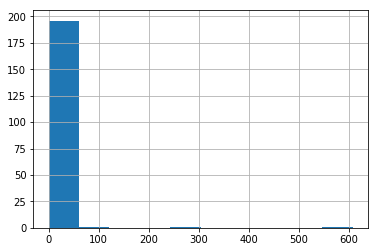

In [28]:
df['val'].hist()

### Now lets test SVM on our hyper-parameter space that you created

In [7]:
# you code goes here



## Well, this was the Grid Search, now time for Random Search

In [2]:
from tqdm import tqdm
from random import random

def test_function(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2


def random_search(bounds, NFE, f):
    
    """
    bound: The bound of the values of the hyperparameter that you would want to optimize the function for
    
    NFE: Number of Evaluations to make
    
    f: function to be optimized 
    
    """
    
    D = len(bounds) 
    best_f = infinity = float("inf") 
    best_x = [None]*D

    for i in tqdm(range(NFE)):
        new_x = [bounds[d][0] + random()*(bounds[d][1] - bounds[d][0]) for d in range(D)]
        new_f = f(new_x)
        if new_f < best_f: 
          best_f = new_f
          best_x = new_x

    return {'best_x': best_x, 'best_f': best_f}

## Will move on to the next notebook now, where using Scikit learn we'll tune some hyper-parameters